<a href="https://colab.research.google.com/github/kidujm/Growth-Strategy-Data/blob/main/%EC%82%AC%EC%A0%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%95%EC%A0%9C_20260223_%EC%9C%A0%EC%A0%95%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# 1. 파일 경로 설정 (동일 폴더 내에 파일이 있다고 가정)
file_danawa = 'danawa_custom_result_1702.csv'
file_social = 'lg_gram_pro_cleaned_data.csv'

# 2. CSV 파일을 데이터프레임으로 로드
# 한글 깨짐 방지를 위해 인코딩은 utf-8 또는 cp949(euc-kr)를 주로 사용하나,
# 앞서 생성된 파일들은 utf-8-sig로 저장되었으므로 기본 utf-8로 읽어옵니다.
df_danawa = pd.read_csv(file_danawa)
df_social = pd.read_csv(file_social)

# 3. 데이터프레임 구조 확인 (상위 5행 출력)
print("--- [다나와 실구매자 리뷰 데이터] ---")
print(df_danawa.head())

print("\n--- [소셜/유튜브 클린 데이터] ---")
print(df_social.head())

# 4. 데이터 요약 정보 확인 (컬럼명, 데이터 개수, 결측치 등)
print("\n--- 데이터 요약 정보 ---")
df_danawa.info()
df_social.info()

--- [다나와 실구매자 리뷰 데이터] ---
       pcode                                         모델명  평균지표         작성일자  \
0  103451456  LG전자 2026 그램 프로16 16Z95U-GS5ZK (SSD 512GB)   165  2026.01.23.   
1  103451456  LG전자 2026 그램 프로16 16Z95U-GS5ZK (SSD 512GB)   165  2026.01.27.   
2  103451456  LG전자 2026 그램 프로16 16Z95U-GS5ZK (SSD 512GB)   165  2026.02.08.   
3  103451456  LG전자 2026 그램 프로16 16Z95U-GS5ZK (SSD 512GB)   165  2026.02.15.   
4  103451456  LG전자 2026 그램 프로16 16Z95U-GS5ZK (SSD 512GB)   165  2026.01.27.   

                                                리뷰본문  
0  기존에 사용하던 노트북이 무겁고 발열도 심해 교체를 고민하던 중 LG 그램 Pro ...  
1  LG 그램 Pro AI 2026을 한 달 정도 쓰고 있는데, 진짜 가볍고 들고 다니...  
2  경쟁사의 공격적인 가격 정책으로 한동안 그램을 쓰지 않았었는데, 16인치 대화면 노...  
3  이번에 대학 입학하는 아들을 위한 선물로 2026년형 LG 그램 Pro AI를 구매...  
4  2026년형 LG 그램 프로 AI 16(16Z95U) 모델을 핵심만 콕콕 집어 리뷰...  

--- [소셜/유튜브 클린 데이터] ---
             Category        Search_Query  \
0  gram_Pro_Arrowlake  그램 프로 애로우레이크 후기 성능   
1  gram_Pro_Arrowlake  그램 프로 애로우레이크 후기 성능   
2  gram_P

In [4]:
import pandas as pd
import numpy as np

# Install Korean font
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Configure Matplotlib to use NanumGothic
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # To prevent breaking minus sign

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117540 files and direct

✅ 통합 완료: 총 441건의 리뷰 데이터가 준비되었습니다.


/tmp/ipython-input-3262287787.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='빈도', y='지표단어', data=top_indicators, palette='viridis')


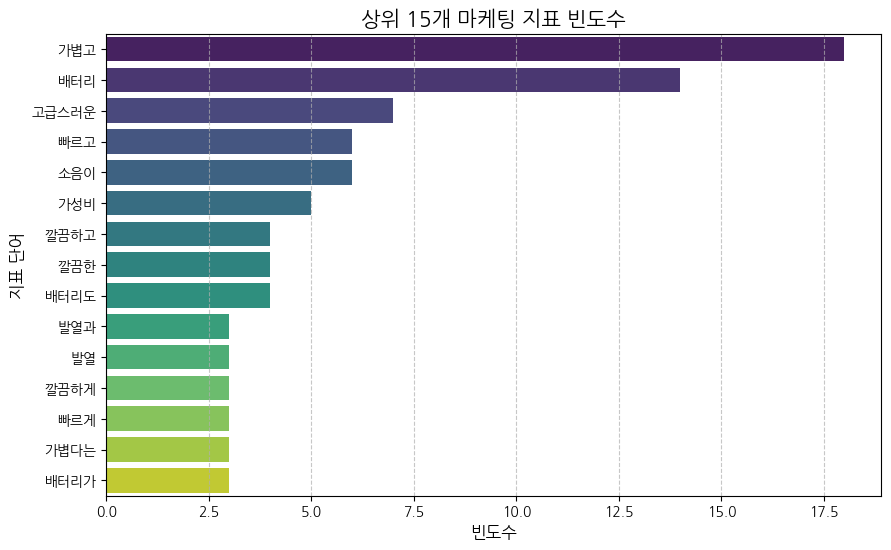

In [12]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 분석에 필요한 컬럼만 추출하여 이름 표준화
# 다나와 데이터: 모델명, 리뷰본문 활용
df_danawa_sub = df_danawa[['모델명', '리뷰본문']].copy()
df_danawa_sub.columns = ['Product_Info', 'Review_Text']
df_danawa_sub['Source'] = 'Danawa' # 출처 표시

# 소셜 데이터: Category를 상품정보로, User_Review_Clean을 리뷰로 활용
df_social_sub = df_social[['Category', 'User_Review_Clean']].copy()
df_social_sub.columns = ['Product_Info', 'Review_Text']
df_social_sub['Source'] = 'Social' # 출처 표시

# 2. 두 테이블을 하나로 통합 (상하 결합)
df_combined = pd.concat([df_danawa_sub, df_social_sub], ignore_index=True)

# 3. 데이터 정제 (결측치 및 중복 리뷰 제거)
df_combined = df_combined.dropna(subset=['Review_Text'])
df_combined = df_combined.drop_duplicates(subset=['Review_Text'])

# 4. 최종 통합 데이터 확인
print(f"✅ 통합 완료: 총 {len(df_combined)}건의 리뷰 데이터가 준비되었습니다.")

# 5. 마케팅 지표 추출 및 빈도수 계산 (이전 셀의 로직을 여기에 포함)
# 제거할 단어 (제품명 및 일반 명사)
exclude_words = [
    '그램', '노트북', '모델', '엘지', 'LG', '제품', '기사님', '배송',
    '구매', '사용', '생각', '진짜', '너무', '정말', '것을', '이번'
]

# 마케팅 지표로 남길 핵심 키워드 패턴 (정규식 또는 리스트)
def extract_marketing_words(text):
    if not isinstance(text, str): return ""

    # 한글 단어 추출
    words = re.findall(r'[가-힣]{2,}', text)

    # 필터링 로직
    marketing_words = []
    for word in words:
        # 제품명/일반명사 제외
        if any(ex in word for ex in exclude_words):
            continue

        # [지표어 예시] 휴대성, 성능, 가격, 만족도 관련 단어만 포함
        indicators = ['가볍', '무겁', '빠르', '느리', '비싸', '저렴', '가성비',
                      '발열', '소음', '화질', '배터리', '깔끔', '고급', '예쁘']

        if any(ind in word for ind in indicators):
            marketing_words.append(word)

    return " ".join(marketing_words)

df_combined['Marketing_Indicators'] = df_combined['Review_Text'].apply(extract_marketing_words)

all_indicators = " ".join(df_combined['Marketing_Indicators']).split()
indicator_counts = Counter(all_indicators)

# 6. 마케팅 지표 시각화 (상위 15개)
top_indicators = pd.DataFrame(indicator_counts.most_common(15), columns=['지표단어', '빈도'])

plt.figure(figsize=(10, 6))
sns.barplot(x='빈도', y='지표단어', data=top_indicators, palette='viridis')
plt.title('상위 15개 마케팅 지표 빈도수', fontsize=15)
plt.xlabel('빈도수', fontsize=12)
plt.ylabel('지표 단어', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# df_combined는 이미 위에서 출력되었으므로, 최종 데이터프레임 확인은 주석처리합니다.
# df_combined

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 35.0 MB/s eta 0:00:00


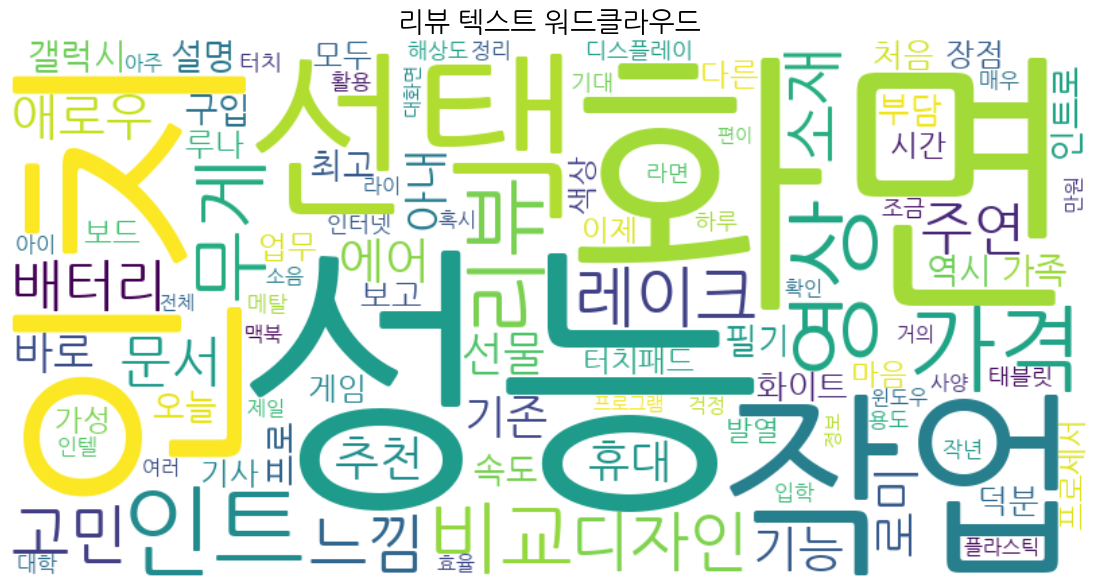

In [14]:
!pip install konlpy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import re

# 모든 리뷰 텍스트를 하나의 문자열로 합치기
all_reviews = ' '.join(df_combined['Review_Text'].dropna().tolist())

# 한글 외 문자 제거 및 숫자 제거
clean_text = re.sub(r'[^가-힣\s]', ' ', all_reviews)
clean_text = re.sub(r'\s+', ' ', clean_text).strip()

# Konlpy의 Okt(Open Korean Text) 형태소 분석기 사용
okt = Okt()

# 명사 추출
nouns = okt.nouns(clean_text)

# 한 글자 명사 및 불용어 제거 (이전에 정의된 exclude_words 활용)
# exclude_words는 이미 다른 셀에서 정의되어 있으므로 재정의하지 않습니다.
# 만약 정의되어 있지 않다면, 이곳에서 다시 정의해야 합니다.

# 추가 불용어 정의 (워드클라우드에 불필요한 단어들)
stop_words = [
    '너무', '정말', '진짜', '있어', '없이', '좋은', '많이', '하고', '것을', '사용', '구매', '같아요', '하는', '입니다',
    '이용', '하나', '대한', '이번', '개인', '생각', '부터', '대한', '정도', '까지', '그냥', '위해', '으로', '으로도',
    '이다', '해서', '에서', '에게', '으로', '하면', '하게', '하고', '적인', '이번', '가장', '보면'
]

# exclude_words와 stop_words를 결합하여 최종 불용어 리스트 생성
all_exclude_words = exclude_words + stop_words

filtered_nouns = [n for n in nouns if len(n) > 1 and n not in all_exclude_words]

# 명사 빈도수 계산
단어_빈도 = Counter(filtered_nouns)

# 워드클라우드 생성
# 한글 폰트 경로 설정 (이전 셀에서 설치된 NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path=font_path,
    width=800, height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate_from_frequencies(단어_빈도)

# 워드클라우드 시각화
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('리뷰 텍스트 워드클라우드', fontsize=20)
plt.show()

import pandas as pd
import re
from collections import Counter

# 1. 제거할 단어 (제품명 및 일반 명사)
exclude_words = [
    '그램', '노트북', '모델', '엘지', 'LG', '제품', '기사님', '배송',
    '구매', '사용', '생각', '진짜', '너무', '정말', '것을', '이번'
]

# 2. 마케팅 지표로 남길 핵심 키워드 패턴 (정규식 또는 리스트)
# 형용사 어근이나 평가 요소들을 포함합니다.
def extract_marketing_words(text):
    if not isinstance(text, str): return ""
    
    # 한글 단어 추출
    words = re.findall(r'[가-힣]{2,}', text)
    
    # 필터링 로직
    marketing_words = []
    for word in words:
        # 제품명/일반명사 제외
        if any(ex in word for ex in exclude_words):
            continue
            
        # [지표어 예시] 휴대성, 성능, 가격, 만족도 관련 단어만 포함
        # 아래 단어들이 포함된 경우만 마케팅 지표로 간주
        indicators = ['가볍', '무겁', '빠르', '느리', '비싸', '저렴', '가성비',
                      '발열', '소음', '화질', '배터리', '깔끔', '고급', '예쁘', '프로','싸']
        
        if any(ind in word for ind in indicators):
            marketing_words.append(word)
            
    return " ".join(marketing_words)

# 3. 데이터프레임 적용
# df_combined는 이전 단계에서 합쳐진 통합 테이블입니다.
df_combined['Marketing_Indicators'] = df_combined['Review_Text'].apply(extract_marketing_words)

# 4. 빈도수 확인 (어떤 지표가 가장 많이 언급되었나?)
all_indicators = " ".join(df_combined['Marketing_Indicators']).split()
indicator_counts = Counter(all_indicators)

# 5. 결과 출력 (상위 20개 지표)
print("📊 마케팅 지표 TOP 20")
print(pd.DataFrame(indicator_counts.most_common(20), columns=['지표단어', '빈도']))

In [11]:
import pandas as pd
import re
from collections import Counter

# 1. 제거할 단어 (제품명 및 일반 명사)
exclude_words = [
    '그램', '노트북', '모델', '엘지', 'LG', '제품', '기사님', '배송',
    '구매', '사용', '생각', '진짜', '너무', '정말', '것을', '이번'
]

# 2. 마케팅 지표로 남길 핵심 키워드 패턴 (정규식 또는 리스트)
# 형용사 어근이나 평가 요소들을 포함합니다.
def extract_marketing_words(text):
    if not isinstance(text, str): return ""

    # 한글 단어 추출
    words = re.findall(r'[가-힣]{2,}', text)

    # 필터링 로직
    marketing_words = []
    for word in words:
        # 제품명/일반명사 제외
        if any(ex in word for ex in exclude_words):
            continue

        # [지표어 예시] 휴대성, 성능, 가격, 만족도 관련 단어만 포함
        # 아래 단어들이 포함된 경우만 마케팅 지표로 간주
        indicators = ['가볍', '무겁', '빠르', '느리', '비싸', '저렴', '가성비',
                      '발열', '소음', '화질', '배터리', '깔끔', '고급', '예쁘']

        if any(ind in word for ind in indicators):
            marketing_words.append(word)

    return " ".join(marketing_words)

# 3. 데이터프레임 적용
# df_combined는 이전 단계에서 합쳐진 통합 테이블입니다.
df_combined['Marketing_Indicators'] = df_combined['Review_Text'].apply(extract_marketing_words)

# 4. 빈도수 확인 (어떤 지표가 가장 많이 언급되었나?)
all_indicators = " ".join(df_combined['Marketing_Indicators']).split()
indicator_counts = Counter(all_indicators)

# 5. 결과 출력 (상위 20개 지표)
print("📊 마케팅 지표 TOP 20")
print(pd.DataFrame(indicator_counts.most_common(20), columns=['지표단어', '빈도']))

📊 마케팅 지표 TOP 20
     지표단어  빈도
0     가볍고  18
1     배터리  14
2   고급스러운   7
3     빠르고   6
4     소음이   6
5     가성비   5
6    깔끔하고   4
7     깔끔한   4
8    배터리도   4
9     발열과   3
10     발열   3
11   깔끔하게   3
12    빠르게   3
13   가볍다는   3
14   배터리가   3
15   가성비가   3
16    화질이   3
17   무겁다는   2
18    가볍다   2
19   가볍다고   2
